# Adult comparison

Comparing the results on the Attacks on Adult using the `5MostSure Voting Classifier`

In [1]:
from pathlib import Path
import sys
from numba import njit

UTILS_RELATIVE_PATH = "../../../"
sys.path.append(UTILS_RELATIVE_PATH)

MLEM_RELATIVE_PATH = "../../../../"
sys.path.append(MLEM_RELATIVE_PATH)

LIME_RELATIVE_PATH = "../../../../lime/"
sys.path.append(LIME_RELATIVE_PATH)

import logging
logging.disable('DEBUG')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from mlem.ensemble import KMostSureVotingClassifier
from utils.attack_evaluation import evaluate_attack
from utils.models import load_pickle_bz2
from utils.dataloading.attack_models import load_attack_models

# Loading the Adult data

In [3]:
from utils.dataloading.adult import load_adult_data, load_adult_randomforest # type: ignore
DATASET = "adult"
assert DATASET == "adult" # to avoid problems when duplicating the notebook
BB = load_adult_randomforest()
BB_DATA = load_adult_data("adult-blackbox-data2.npz")

print(classification_report(BB_DATA['y_test'], BB.predict(BB_DATA['X_test'])))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8157
           1       0.79      0.61      0.69      2690

    accuracy                           0.86     10847
   macro avg       0.84      0.78      0.80     10847
weighted avg       0.86      0.86      0.86     10847



In the following experiments:
* Data: indicates the data used to create the Explainer.
* Attack: indicates the data used to create the Shadow Models.
* Explainer: The Explainer used (Either the Lime Regressor or the Decision Tree).
* Filter: if true the *Data* have been filtered using mean + 3std.
* Instances Selection: 3-elems per quantile or distance-based approach

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`
Here the attack dataset is the one generated by LIME, the same one used to train the Decision Trees. The generated points have not been filtered.

In [4]:
PATH = Path('../../decision_tree/decision_tree_dataset_no3std/adult/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.92      0.80     25308
         out       0.29      0.08      0.12     10847

    accuracy                           0.67     36155
   macro avg       0.50      0.50      0.46     36155
weighted avg       0.58      0.67      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.96      0.81     20353
         out       0.28      0.03      0.06      8766

    accuracy                           0.68     29119
   macro avg       0.49      0.50      0.43     29119
weighted avg       0.57      0.68      0.58     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.75      0.73      4955
         out       0.30      0.25      0.27      2081

    accuracy                           0.61      7036
   macro avg       0.50      0.50      0.50      7036
weighted avg       0.59      0.61      0.60 

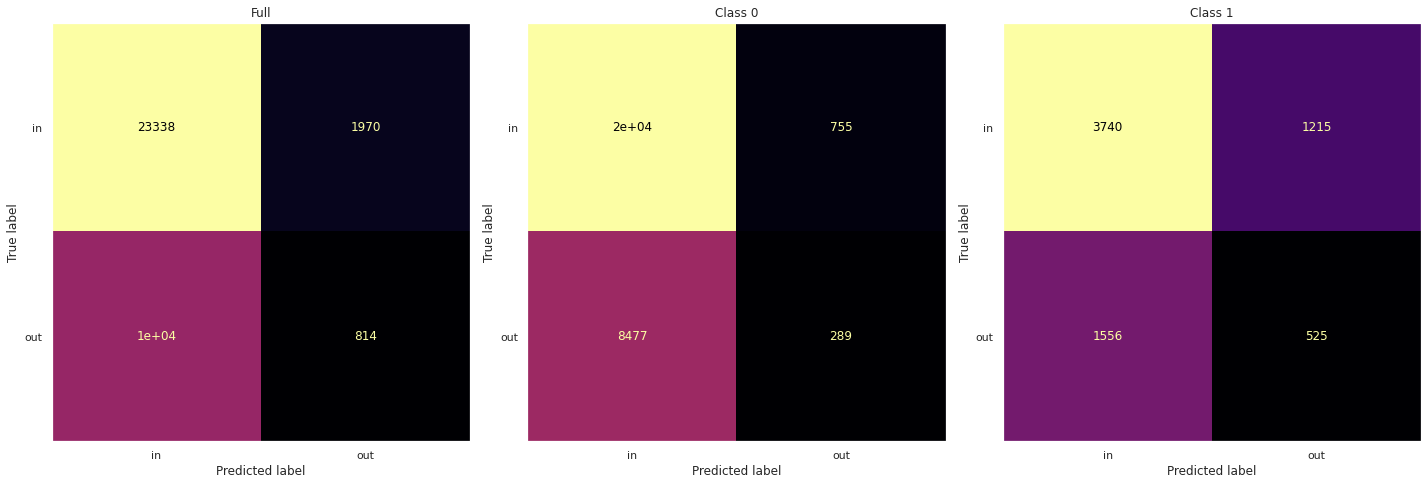

In [5]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`
Here the attack dataset is the one generated by LIME, the same one used to train the Decision Trees. The generated points have been filtered.

In [6]:
PATH = Path(f"../../decision_tree/decision_tree_dataset/adult/experiment_output")
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.96      0.81     25308
         out       0.31      0.04      0.08     10847

    accuracy                           0.68     36155
   macro avg       0.51      0.50      0.44     36155
weighted avg       0.58      0.68      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.99      0.82     20353
         out       0.34      0.01      0.02      8766

    accuracy                           0.70     29119
   macro avg       0.52      0.50      0.42     29119
weighted avg       0.59      0.70      0.58     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.83      0.76      4955
         out       0.31      0.18      0.23      2081

    accuracy                           0.64      7036
   macro avg       0.51      0.51      0.50      7036
weighted avg       0.59      0.64      0.60 

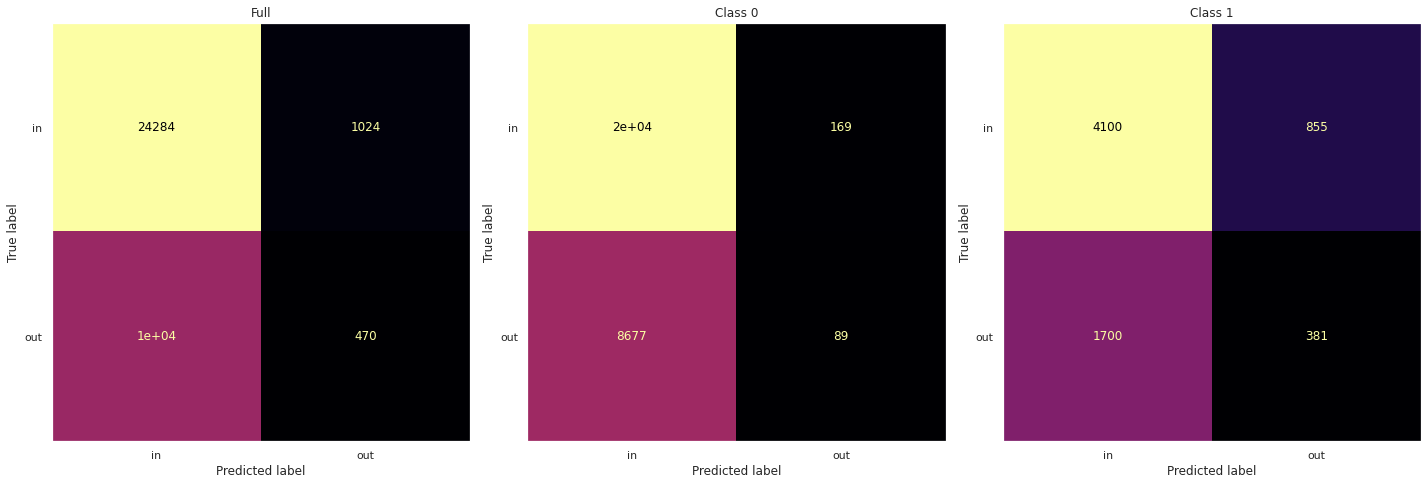

In [7]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Regressor` Filter: `False` Instances Selection: `Distance`
Here the attack dataset is the one generated by LIME, the same one used to train the Decision Trees. The generated points have not been filtered.

In [8]:
PATH = Path('../../standard_lime/lime_generated/adult/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.71      0.71     25308
         out       0.30      0.29      0.29     10847

    accuracy                           0.59     36155
   macro avg       0.50      0.50      0.50     36155
weighted avg       0.58      0.59      0.58     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.85      0.77     20353
         out       0.31      0.15      0.20      8766

    accuracy                           0.64     29119
   macro avg       0.50      0.50      0.49     29119
weighted avg       0.58      0.64      0.60     29119


Class 1
              precision    recall  f1-score   support

          in       0.70      0.13      0.22      4955
         out       0.30      0.87      0.44      2081

    accuracy                           0.35      7036
   macro avg       0.50      0.50      0.33      7036
weighted avg       0.58      0.35      0.29 

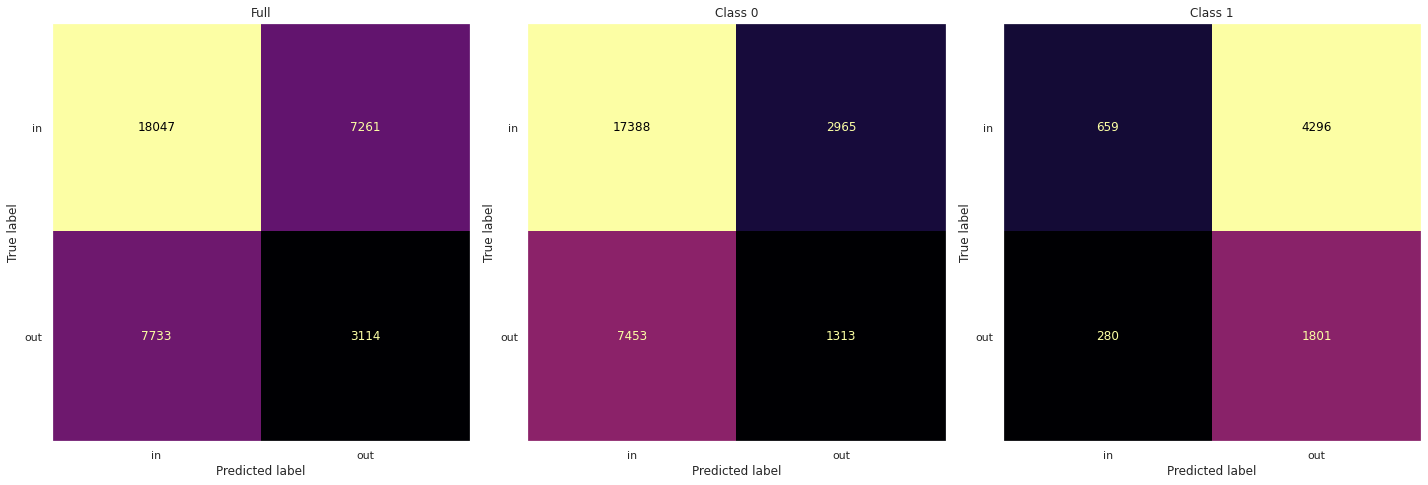

In [9]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Regressor` Filter: `True` Instances Selection: `Distance`
Here the attack dataset is the one generated by LIME, the same one used to train the Decision Trees. The generated points have been filtered.

In [10]:
PATH = Path('../../standard_lime/lime_generated_filter/adult/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.77      0.73     25308
         out       0.30      0.23      0.26     10847

    accuracy                           0.61     36155
   macro avg       0.50      0.50      0.50     36155
weighted avg       0.58      0.61      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.88      0.78     20353
         out       0.31      0.12      0.18      8766

    accuracy                           0.65     29119
   macro avg       0.51      0.50      0.48     29119
weighted avg       0.58      0.65      0.60     29119


Class 1
              precision    recall  f1-score   support

          in       0.70      0.30      0.42      4955
         out       0.29      0.68      0.41      2081

    accuracy                           0.42      7036
   macro avg       0.49      0.49      0.42      7036
weighted avg       0.58      0.42      0.42 

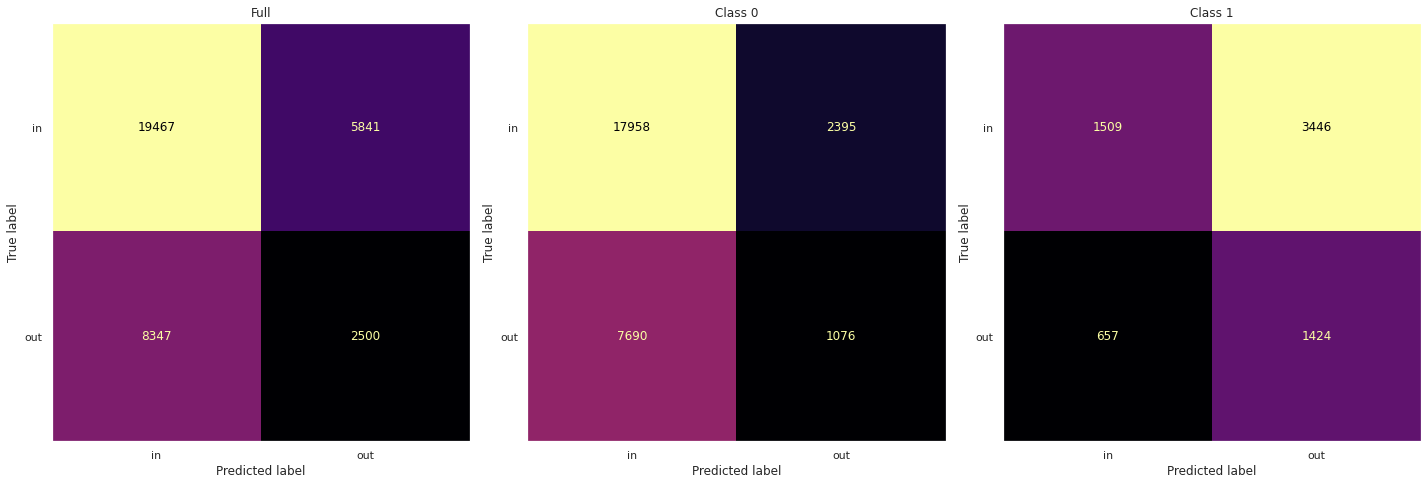

In [11]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Black Box Train` Attack: `Statistical` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [12]:
PATH = Path('../../decision_tree/statistical_no3std/adult/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.81      0.75     25308
         out       0.30      0.18      0.23     10847

    accuracy                           0.62     36155
   macro avg       0.50      0.50      0.49     36155
weighted avg       0.58      0.62      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.94      0.80     20353
         out       0.31      0.07      0.11      8766

    accuracy                           0.67     29119
   macro avg       0.51      0.50      0.46     29119
weighted avg       0.58      0.67      0.59     29119


Class 1
              precision    recall  f1-score   support

          in       0.69      0.30      0.42      4955
         out       0.29      0.68      0.41      2081

    accuracy                           0.41      7036
   macro avg       0.49      0.49      0.41      7036
weighted avg       0.57      0.41      0.42 

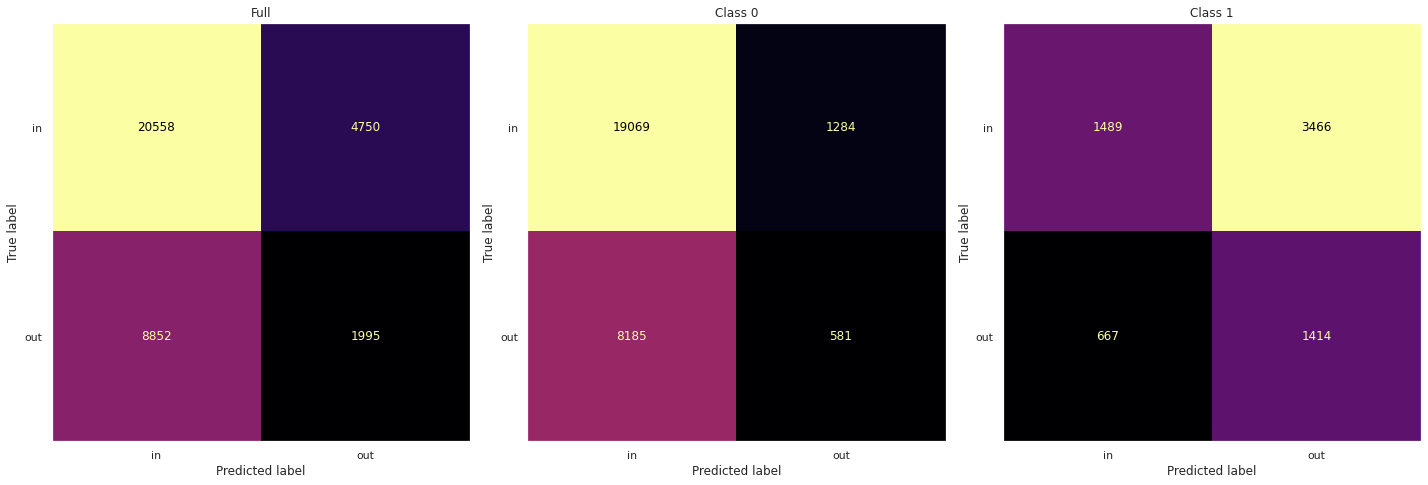

In [13]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Black Box Train` Attack: `Statistical` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`

Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [14]:
PATH = Path('../../decision_tree/statistical/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.93      0.80     25308
         out       0.31      0.08      0.12     10847

    accuracy                           0.67     36155
   macro avg       0.50      0.50      0.46     36155
weighted avg       0.58      0.67      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.97      0.81     20353
         out       0.30      0.03      0.06      8766

    accuracy                           0.69     29119
   macro avg       0.50      0.50      0.44     29119
weighted avg       0.58      0.69      0.58     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.76      0.73      4955
         out       0.31      0.26      0.28      2081

    accuracy                           0.61      7036
   macro avg       0.51      0.51      0.51      7036
weighted avg       0.59      0.61      0.60 

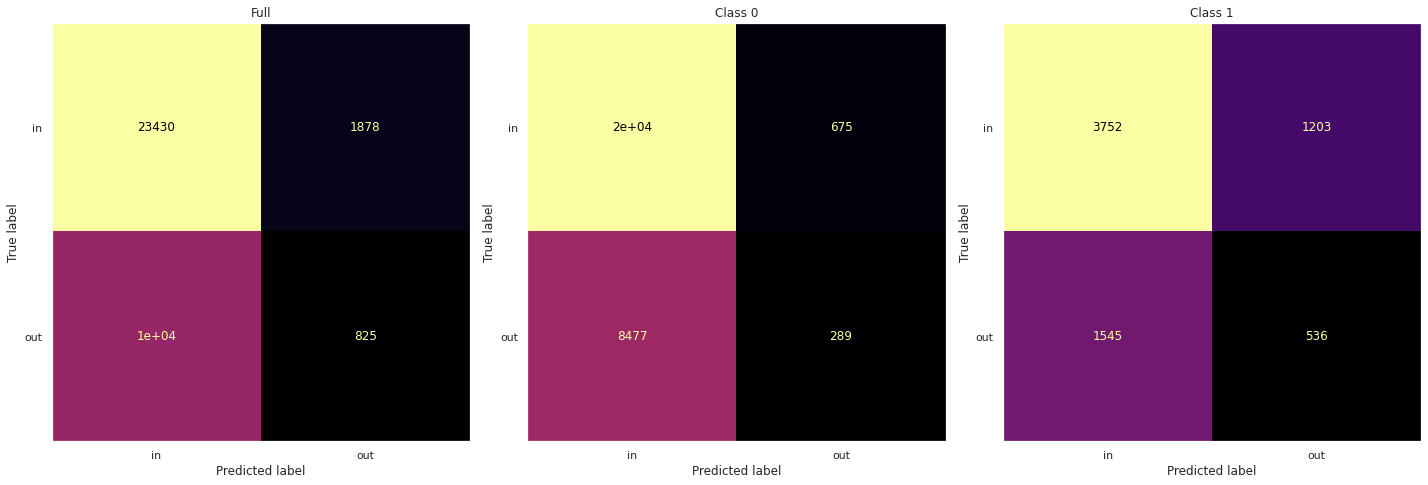

In [15]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Noisy dataset` Attack: `Statistical` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [16]:
PATH = Path('../../decision_tree/statistical_noisy/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.93      0.80     25308
         out       0.31      0.07      0.12     10847

    accuracy                           0.67     36155
   macro avg       0.51      0.50      0.46     36155
weighted avg       0.58      0.67      0.60     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.93      0.80     20353
         out       0.31      0.08      0.13      8766

    accuracy                           0.67     29119
   macro avg       0.51      0.50      0.46     29119
weighted avg       0.58      0.67      0.59     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.96      0.81      4955
         out       0.32      0.04      0.08      2081

    accuracy                           0.69      7036
   macro avg       0.51      0.50      0.44      7036
weighted avg       0.59      0.69      0.60 

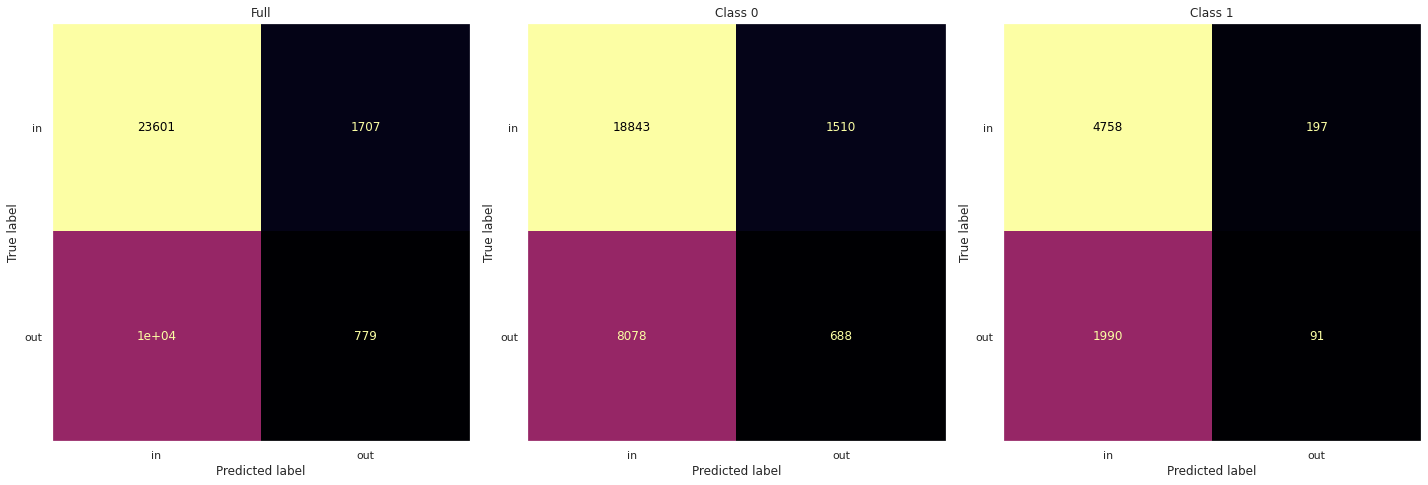

In [17]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Noisy dataset` Attack: `Statistical` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [18]:
PATH = Path('../../decision_tree/statistical_noisy_filter/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.10      0.18     25308
         out       0.30      0.90      0.45     10847

    accuracy                           0.34     36155
   macro avg       0.50      0.50      0.31     36155
weighted avg       0.58      0.34      0.26     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.05      0.10     20353
         out       0.30      0.95      0.46      8766

    accuracy                           0.32     29119
   macro avg       0.50      0.50      0.28     29119
weighted avg       0.58      0.32      0.21     29119


Class 1
              precision    recall  f1-score   support

          in       0.70      0.29      0.41      4955
         out       0.30      0.71      0.42      2081

    accuracy                           0.41      7036
   macro avg       0.50      0.50      0.41      7036
weighted avg       0.58      0.41      0.41 

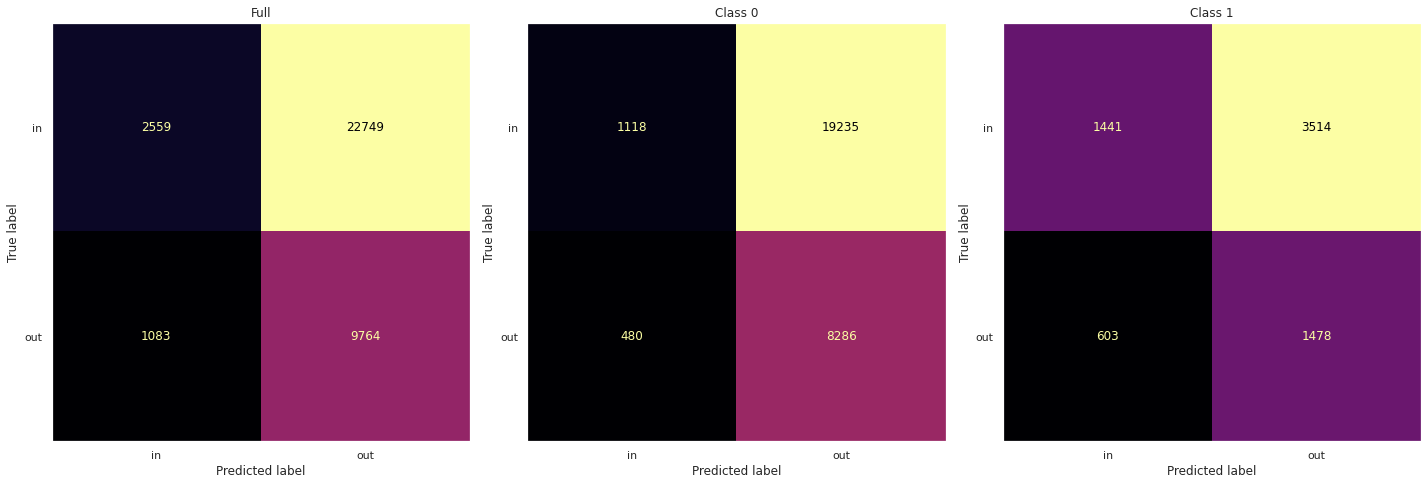

In [19]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Noisy` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`

Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [20]:
PATH = Path('../../decision_tree/trepan/noisy/adult/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.96      0.81     25308
         out       0.30      0.04      0.07     10847

    accuracy                           0.68     36155
   macro avg       0.50      0.50      0.44     36155
weighted avg       0.58      0.68      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.95      0.81     20353
         out       0.30      0.05      0.09      8766

    accuracy                           0.68     29119
   macro avg       0.50      0.50      0.45     29119
weighted avg       0.58      0.68      0.59     29119


Class 1
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      4955
         out       0.30      0.01      0.01      2081

    accuracy                           0.70      7036
   macro avg       0.50      0.50      0.42      7036
weighted avg       0.59      0.70      0.58 

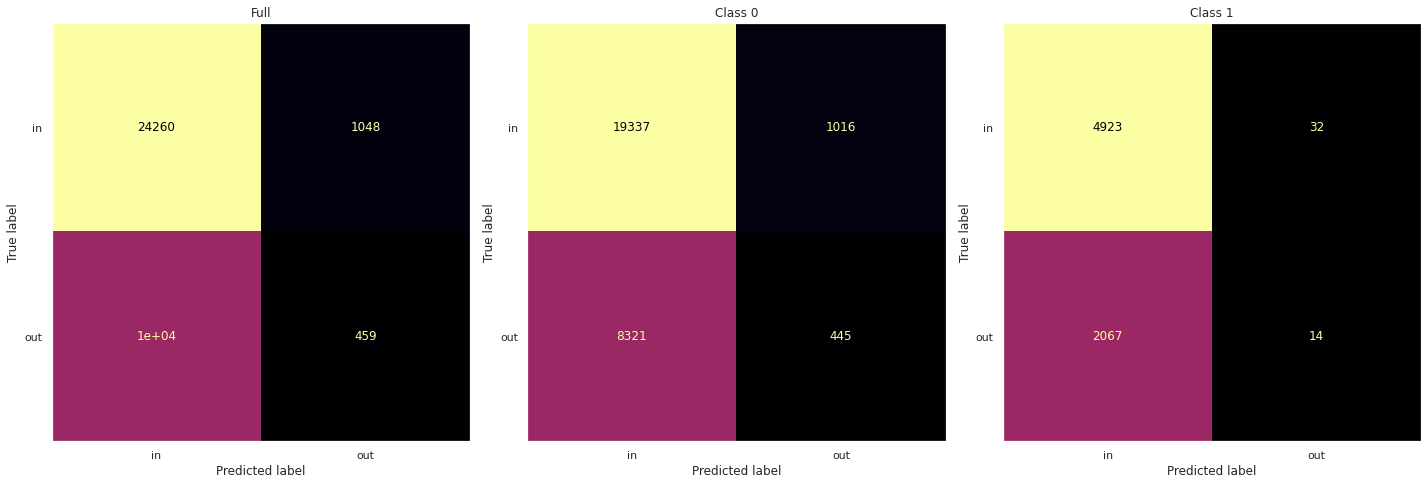

In [21]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Noisy` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [22]:
PATH = Path('../../decision_tree/trepan/noisy_filtering/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.69      0.13      0.22     25308
         out       0.30      0.86      0.44     10847

    accuracy                           0.35     36155
   macro avg       0.49      0.50      0.33     36155
weighted avg       0.57      0.35      0.29     36155


Class 0
              precision    recall  f1-score   support

          in       0.66      0.04      0.08     20353
         out       0.30      0.95      0.45      8766

    accuracy                           0.32     29119
   macro avg       0.48      0.50      0.27     29119
weighted avg       0.55      0.32      0.20     29119


Class 1
              precision    recall  f1-score   support

          in       0.70      0.49      0.57      4955
         out       0.29      0.50      0.37      2081

    accuracy                           0.49      7036
   macro avg       0.50      0.50      0.47      7036
weighted avg       0.58      0.49      0.51 

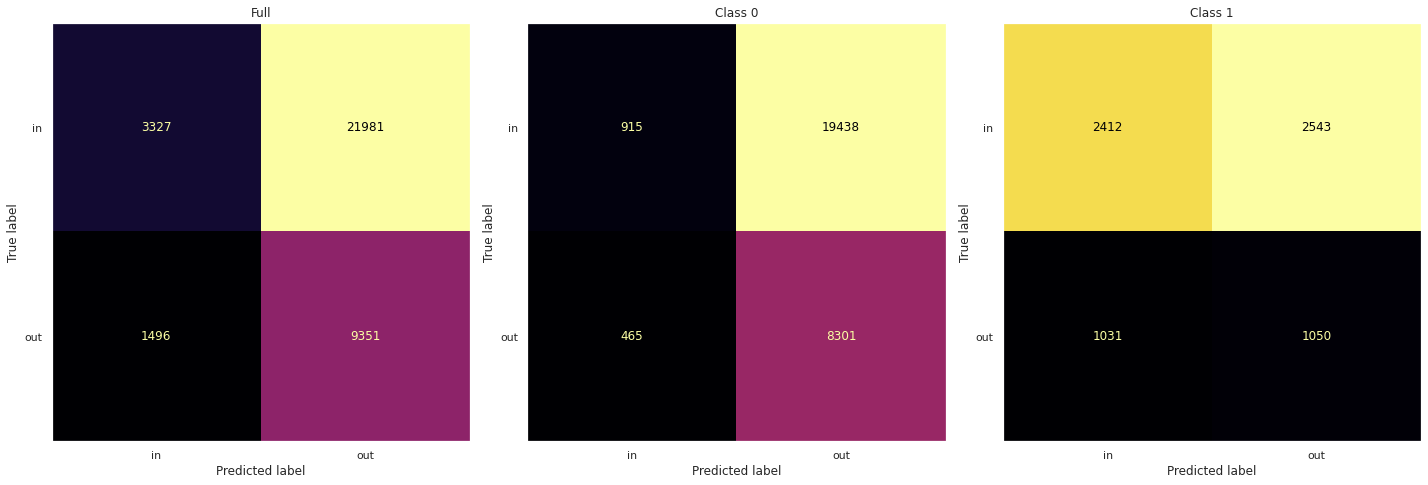

In [23]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [24]:
PATH = Path('../../decision_tree/trepan/statistical/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.83      0.76     25308
         out       0.30      0.17      0.22     10847

    accuracy                           0.63     36155
   macro avg       0.50      0.50      0.49     36155
weighted avg       0.58      0.63      0.60     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      1.00      0.82     20353
         out       0.24      0.00      0.01      8766

    accuracy                           0.70     29119
   macro avg       0.47      0.50      0.41     29119
weighted avg       0.56      0.70      0.58     29119


Class 1
              precision    recall  f1-score   support

          in       0.73      0.14      0.24      4955
         out       0.30      0.87      0.45      2081

    accuracy                           0.36      7036
   macro avg       0.51      0.51      0.34      7036
weighted avg       0.60      0.36      0.30 

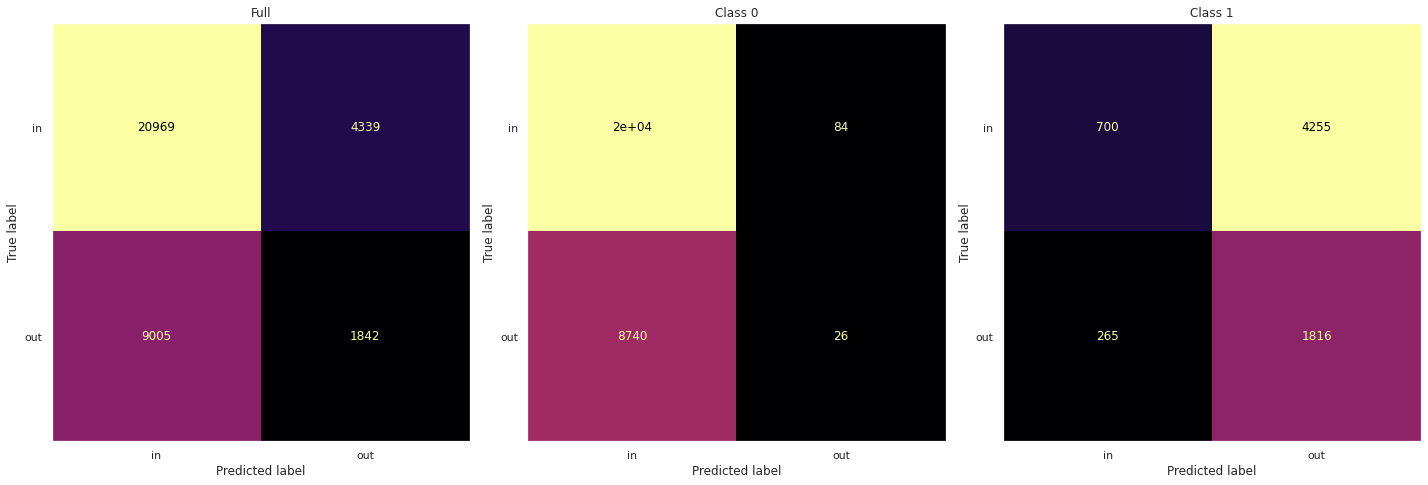

In [25]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [26]:
PATH = Path('../../decision_tree/trepan/statistical_filtering/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.99      0.82     25308
         out       0.34      0.01      0.02     10847

    accuracy                           0.70     36155
   macro avg       0.52      0.50      0.42     36155
weighted avg       0.59      0.70      0.58     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.99      0.82     20353
         out       0.31      0.01      0.01      8766

    accuracy                           0.70     29119
   macro avg       0.51      0.50      0.42     29119
weighted avg       0.58      0.70      0.58     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.97      0.82      4955
         out       0.36      0.04      0.07      2081

    accuracy                           0.69      7036
   macro avg       0.53      0.50      0.44      7036
weighted avg       0.60      0.69      0.60 

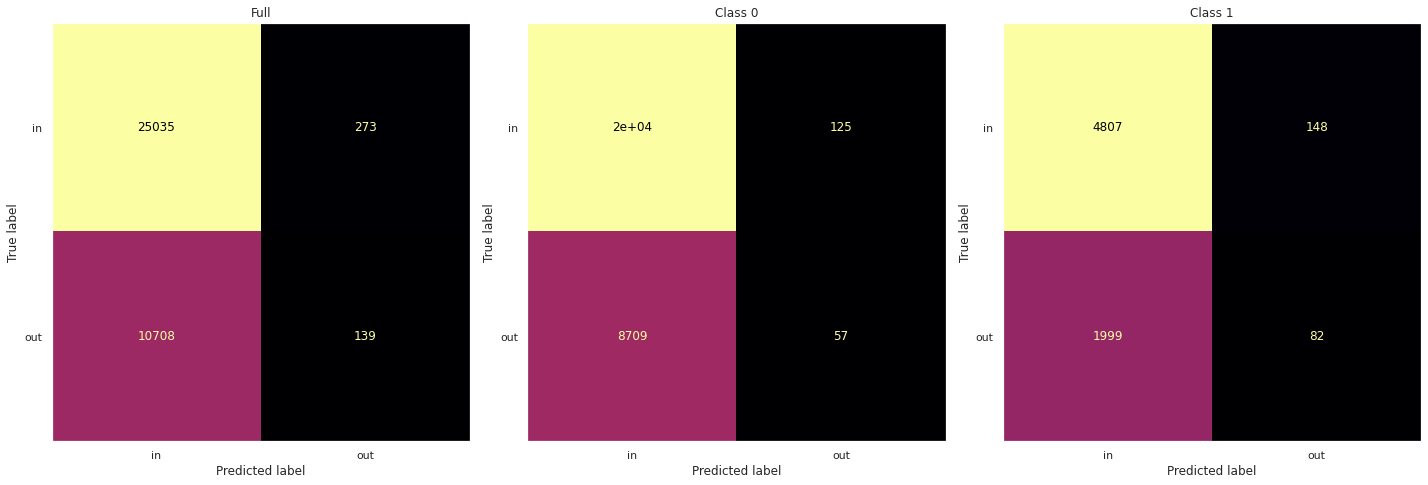

In [27]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`

Here I didn't balanced the dataset generated by trepan and for each `Decision Tree` I generated a dataset of $80,000$ elements.

In [28]:
PATH = Path('../../decision_tree/trepan/trepan_statistical_filtering_nobalanced/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.82      0.75     25308
         out       0.30      0.18      0.23     10847

    accuracy                           0.63     36155
   macro avg       0.50      0.50      0.49     36155
weighted avg       0.58      0.63      0.60     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.96      0.81     20353
         out       0.31      0.04      0.07      8766

    accuracy                           0.69     29119
   macro avg       0.51      0.50      0.44     29119
weighted avg       0.58      0.69      0.59     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.22      0.34      4955
         out       0.30      0.79      0.43      2081

    accuracy                           0.39      7036
   macro avg       0.51      0.50      0.38      7036
weighted avg       0.59      0.39      0.36 

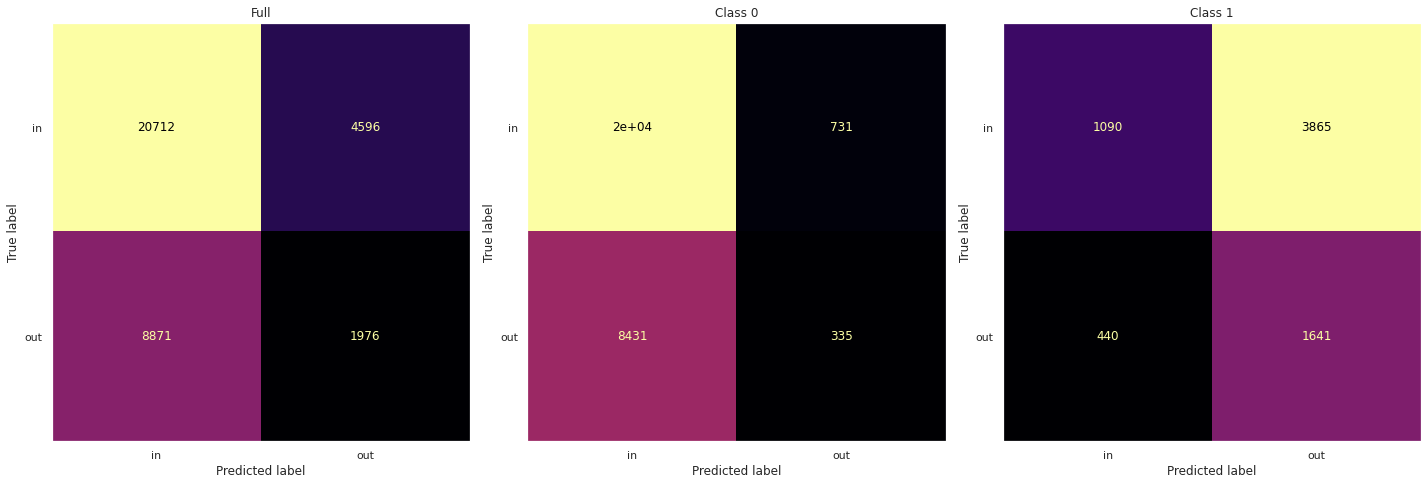

In [29]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`

Here I didn't balanced the dataset generated by trepan and for each `Decision Tree` I generated a dataset of $80,000$ elements.

In [30]:
PATH = Path('../../decision_tree/trepan/trepan_statistical_nobalanced/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.98      0.82     25308
         out       0.32      0.02      0.04     10847

    accuracy                           0.69     36155
   macro avg       0.51      0.50      0.43     36155
weighted avg       0.59      0.69      0.58     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.98      0.82     20353
         out       0.32      0.02      0.04      8766

    accuracy                           0.69     29119
   macro avg       0.51      0.50      0.43     29119
weighted avg       0.59      0.69      0.58     29119


Class 1
              precision    recall  f1-score   support

          in       0.70      1.00      0.82      4955
         out       0.28      0.00      0.01      2081

    accuracy                           0.70      7036
   macro avg       0.49      0.50      0.42      7036
weighted avg       0.58      0.70      0.58 

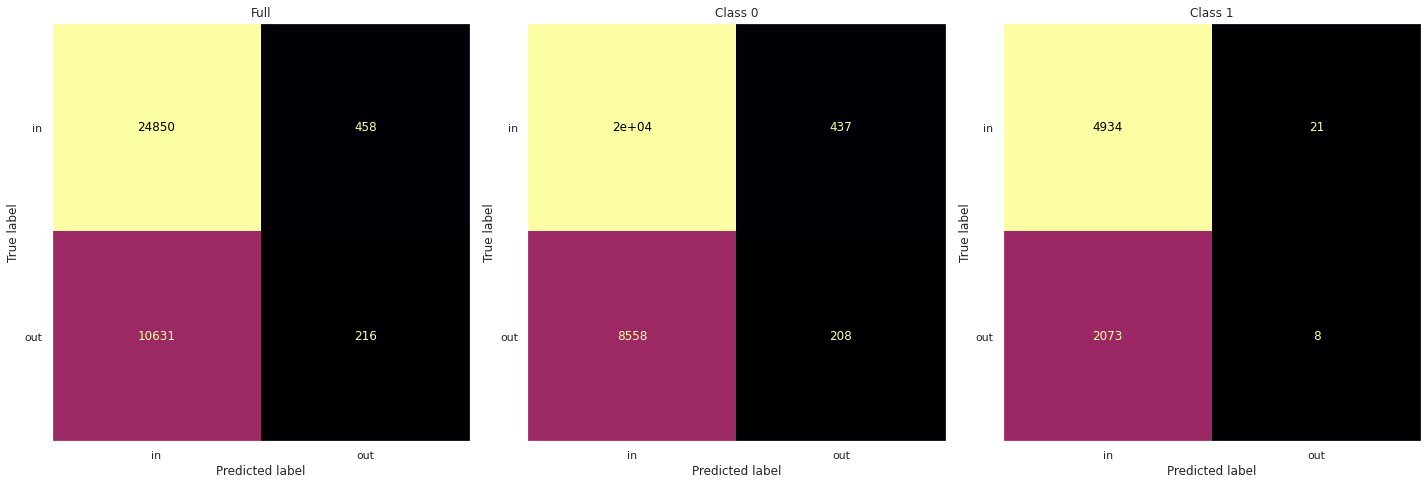

In [31]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `CFS` Attack: `Noisy` on `Black Box Train` Explainer: `Decision Tree`  Instances Selection: `Distance`

In [32]:
PATH = Path('../../decision_tree/CFS/adult/noisy/experiment_output')
assert PATH.exists()

In [33]:
from utils.dataloading.attack_models import load_attack_models

report full
              precision    recall  f1-score   support

          in       0.70      0.94      0.80     25308
         out       0.30      0.06      0.10     10847

    accuracy                           0.68     36155
   macro avg       0.50      0.50      0.45     36155
weighted avg       0.58      0.68      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.93      0.80     20353
         out       0.30      0.08      0.12      8766

    accuracy                           0.67     29119
   macro avg       0.50      0.50      0.46     29119
weighted avg       0.58      0.67      0.59     29119


Class 1
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      4955
         out       0.33      0.01      0.02      2081

    accuracy                           0.70      7036
   macro avg       0.52      0.50      0.42      7036
weighted avg       0.59      0.70      0.59 

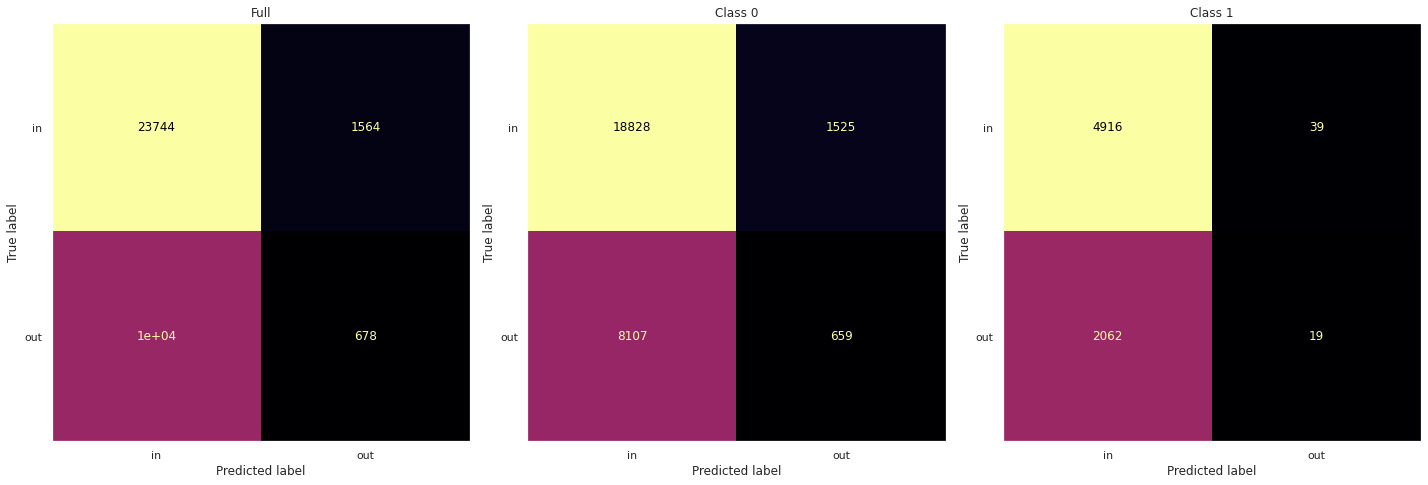

In [34]:
attack_0, attack_1, instances = load_attack_models(PATH, load_instances=False)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `CFS` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Instances Selection: `Distance`

In [35]:
PATH = Path('../../decision_tree/CFS/adult/statistical/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.82      0.76     25308
         out       0.30      0.18      0.22     10847

    accuracy                           0.63     36155
   macro avg       0.50      0.50      0.49     36155
weighted avg       0.58      0.63      0.60     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.95      0.81     20353
         out       0.30      0.05      0.08      8766

    accuracy                           0.68     29119
   macro avg       0.50      0.50      0.44     29119
weighted avg       0.58      0.68      0.59     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.30      0.42      4955
         out       0.30      0.72      0.42      2081

    accuracy                           0.42      7036
   macro avg       0.51      0.51      0.42      7036
weighted avg       0.59      0.42      0.42 

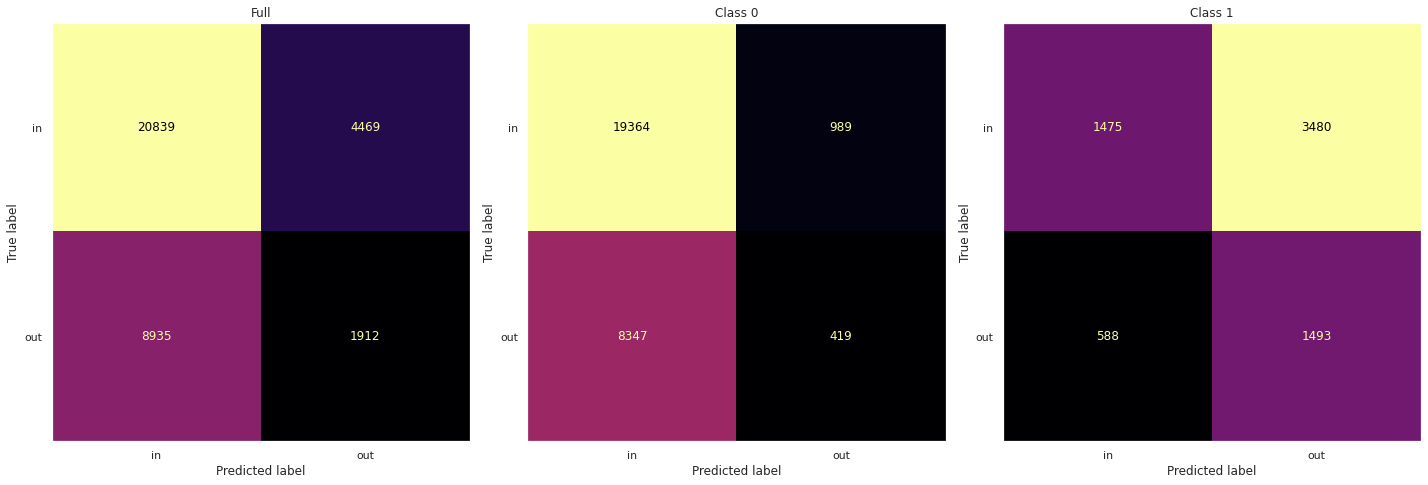

In [36]:
attack_0, attack_1, instances = load_attack_models(PATH, load_instances=False)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)